<a href="https://colab.research.google.com/github/Jusniana/PFG-Juliana-Camargo/blob/main/PFG_Juliana_Camargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Juliana de Carvalho Camargo**


Memória de cálculo do projeto final de graduação:

**Análise e dimensionamento de leito fluidizado: Um projeto conceitural**



Orientadora: Profa. Dra. Erika de Queiros Eugenio


# Preparando o ambiente de trabalho

In [ ]:
import sympy as sp
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Eq
from operator import itemgetter

# Caracterização dos particulados sólidos


 Para compreensão do código é necessário considerar a simbologia:

 0 - Partícula 1;

 1- Partícula 2;

 2 - Partícula 3.


## Diâmetro médio



$$d_p = \frac{M_D ⋅ Esc}{100}$$

<br>

$d_p$ = diâmetro da partícula;

$M_D$ = Média de todos os diâmetros de cada partícula;

$Esc$ = Escala projetada;


In [ ]:
# Equação do diâmetro médio
def eq_dm (*diametros, escala_projecao):
  media = sum(diametros) / len(diametros)
  diametro_medio = media*escala_projecao/100
  return diametro_medio

In [ ]:
# Escala no qual os objetos encontram-se projetados
escala = 2/18.2
escala

0.10989010989010989

In [ ]:
# Diâmetros medidos experimentalmente na projeção de cada tipo de partícula
diametros0 = [2.9,2.9] #diâmetros da partícula 1
diametros1 = [8.8,5.4,5.2] #diâmetros da partícula 2
diametros2 = [7.5,7.5] #diâmetros da partícula 3

In [ ]:
# Cálculo do diâmetro médio de casa tipo de partícula
Dp0 = eq_dm(*diametros0, escala_projecao=escala) #Diâmetro médio da partícula 1
Dp1 = eq_dm(*diametros1, escala_projecao=escala) #Diâmetro médio da partícula 2
Dp2 = eq_dm(*diametros2, escala_projecao=escala) #Diâmetro médio da partícula 3

In [ ]:
# Diâmetro médio em metros
Diametro_medio= Dp0, Dp1, Dp2
Diametro_medio

(0.0031868131868131866, 0.0071062271062271075, 0.008241758241758242)

In [ ]:
print("Diâmetro médio da partícula 1", round(Diametro_medio[0],4), " metros.")
print("Diâmetro médio da partícula 2", round(Diametro_medio[1],4), " metros.")
print("Diâmetro médio da partícula 3", round(Diametro_medio[2],4), " metros.")

Diâmetro médio da partícula 1 0.0032  metros.
Diâmetro médio da partícula 2 0.0071  metros.
Diâmetro médio da partícula 3 0.0082  metros.


## Massa específica

$$ 𝘱 = \frac{m_4 - m_1}{V_{pic}}$$


<br>

𝘱 = massa específica da água;

$m_4$ = massa do picnômetro com a água

$m_1$ = massa do picnômetro

$V_{pic}$ = volume do picnômetro

In [ ]:
# Cálculo da massa específica da água
rho_agua= (45.783-20.723)/25.140
rho_agua #g/ml

0.9968178202068417



---



$$ 𝘱_p = \frac{m_2 - m_1}{V_{pic}-\frac{m_3 - m_2}{𝘱}}$$


<br>

$𝘱_p$ = massa específica da partícula

𝘱 = massa específica da água;

$m_1$ = massa do picnômetro

$m_2$ = massa do picnômetro com as partículas

$m_3$ = massa do picnômetro com as partículas e a água

$V_{pic}$ = volume do picnômetro

In [ ]:
# Equação para determinar a massa específica das partículas
# Foram realizadas em triplicatas, logo utiliza-se a média
def eq_rho(m1,m2,m3, Vpic, rho_agua):
  rhoA = ((m2[0]-m1[0])/(Vpic[0] - ((m3[0]-m2[0])/rho_agua)))*(1000) # massa específica no experimento A
  rhoB = ((m2[1]-m1[1])/(Vpic[1] - ((m3[1]-m2[1])/rho_agua)))*(1000) # massa específica no experimento B
  rhoC = ((m2[2]-m1[2])/(Vpic[2] - ((m3[2]-m2[2])/rho_agua)))*(1000) # massa específica no experimento C
  # cálculo da média das massas específicas
  rho_medio = np.mean([rhoA, rhoB, rhoC])
  return rho_medio, rhoA, rhoB, rhoC

### Partícula 1

In [ ]:
# Dados experimentais da partícula 1
dados_rho_particula_1 = {
    'Experimento A': [20.741, 22.032, 46.526, 25.140],
    'Experimento B': [20.686, 22.003, 46.511, 25.140],
    'Experimento C': [20.697, 22.096, 46.577, 25.140]}

# Índices das linhas
linhas = ['Massa 1 (g)', 'Massa 2 (g)', 'Massa 3 (g)', 'Volume do picnômetro (mL)']

# Criando o DataFrame
df_rho_particula_1 = pd.DataFrame(dados_rho_particula_1, index=linhas)

# Imprimindo o DataFrame
df_rho_particula_1

,Experimento A,Experimento B,Experimento C
Massa 1 (g),20.741,20.686,20.697
Massa 2 (g),22.032,22.003,22.096
Massa 3 (g),46.526,46.511,46.577
Volume do picnômetro (mL),25.140,25.140,25.140


In [ ]:
# Definindo os dados para a função eq_rho
m10 = df_rho_particula_1.loc['Massa 1 (g)'].values
m20 = df_rho_particula_1.loc['Massa 2 (g)'].values
m30 = df_rho_particula_1.loc['Massa 3 (g)'].values
Vpic0 = df_rho_particula_1.loc['Volume do picnômetro (mL)'].values

In [ ]:
# Cálculo da massa específica da partícula 1 usando a função eq_rho
rho_particula_1= eq_rho(m10,m20,m30, Vpic0, rho_agua)

In [ ]:
print('Resultados da massa específica para partícula 1')
print('Massa específica no experimento A:', rho_particula_1 [1])
print('Massa específica no experimento B:', rho_particula_1 [2])
print('Massa específica no experimento C:', rho_particula_1 [3])
print('Média das massas específicas nos experimentos:', rho_particula_1 [0])

Resultados da massa específica para partícula 1
Massa específica no experimento A: 2273.66043442939
Massa específica no experimento B: 2378.277299297857
Massa específica no experimento C: 2408.545993902178
Média das massas específicas nos experimentos: 2353.494575876475


In [ ]:
# Adicionando uma nova linha ao DataFrame existente
df_rho_particula_1.loc['massa específica nos experimentos (Kg/mˆ3)'] = [rho_particula_1[1], rho_particula_1[2], rho_particula_1[3]]
df_rho_particula_1.loc['média da massa específica da partícula 1 (Kg/mˆ3)'] = ['->', '->', rho_particula_1[0]]


# Imprimindo o novo DataFrame
df_rho_particula_1

,Experimento A,Experimento B,Experimento C
Massa 1 (g),20.741,20.686,20.697000
Massa 2 (g),22.032,22.003,22.096000
Massa 3 (g),46.526,46.511,46.577000
Volume do picnômetro (mL),25.14,25.14,25.140000
massa específica nos experimentos (Kg/mˆ3),2273.660434,2378.277299,2408.545994
média da massa específica da partícula 1 (Kg/mˆ3),->,->,2353.494576


### partícula 2

In [ ]:
# Dados experimentais da partícula 2
dados_rho_particula_2 = {
    'Experimento A': [20.670, 21.406, 45.842, 25.140],
    'Experimento B': [20.674, 21.408, 45.847, 25.140],
    'Experimento C': [20.695, 21.436, 45.847, 25.140]}

# Índices das linhas
linhas = ['Massa 1 (g)', 'Massa 2 (g)', 'Massa 3 (g)', 'Volume do picnômetro (mL)']

# Criando o DataFrame
df_rho_particula_2 = pd.DataFrame(dados_rho_particula_2, index=linhas)

# Imprimindo o DataFrame
df_rho_particula_2

,Experimento A,Experimento B,Experimento C
Massa 1 (g),20.670,20.674,20.695
Massa 2 (g),21.406,21.408,21.436
Massa 3 (g),45.842,45.847,45.847
Volume do picnômetro (mL),25.140,25.140,25.140


In [ ]:
# Definindo os dados para a função eq_rho
m11 = df_rho_particula_2.loc['Massa 1 (g)'].values
m21 = df_rho_particula_2.loc['Massa 2 (g)'].values
m31 = df_rho_particula_2.loc['Massa 3 (g)'].values
Vpic1 = df_rho_particula_2.loc['Volume do picnômetro (mL)'].values

In [ ]:
# Calculo da massa específica da partícula 2 usando a função eq_rho
rho_particula_2= eq_rho(m11,m21,m31, Vpic1, rho_agua)

In [ ]:
print('Resultados da massa específica para partícula 2')
print('Massa específica no experimento A:', rho_particula_2 [1])
print('Massa específica no experimento B:', rho_particula_2 [2])
print('Massa específica no experimento C:', rho_particula_2 [3])
print('Média das massas específicas nos experimentos:', rho_particula_2 [0])

Resultados da massa específica para partícula 2
Massa específica no experimento A: 1175.733839218316
Massa específica no experimento B: 1178.2033494876325
Massa específica no experimento C: 1138.1232739187512
Média das massas específicas nos experimentos: 1164.0201542082334


In [ ]:
# Adicionando uma nova linha ao DataFrame existente
df_rho_particula_2.loc['massa específica nos experimentos (Kg/mˆ3)'] = [rho_particula_2[1], rho_particula_2[2], rho_particula_2[3]]
df_rho_particula_2.loc['média da massa específica da partícula 2 (Kg/mˆ3)'] = ['->', '->', rho_particula_2[0]]

# Imprimindo o novo DataFrame
df_rho_particula_2

,Experimento A,Experimento B,Experimento C
Massa 1 (g),20.67,20.674,20.695000
Massa 2 (g),21.406,21.408,21.436000
Massa 3 (g),45.842,45.847,45.847000
Volume do picnômetro (mL),25.14,25.14,25.140000
massa específica nos experimentos (Kg/mˆ3),1175.733839,1178.203349,1138.123274
média da massa específica da partícula 2 (Kg/mˆ3),->,->,1164.020154


### Partícula 3

In [ ]:
# Dados experimentais da partícula 3
dados_rho_particula_3 = {
    'Experimento A': [25.044, 28.302, 75.754, 50],
    'Experimento B': [24.992, 28.258, 75.648, 50],
    'Experimento C': [24.981, 28.283, 75.593, 50]}

# Índices das linhas
linhas = ['Massa 1 (g)', 'Massa 2 (g)', 'Massa 3 (g)', 'Volume do picnômetro (mL)']

# Criando o DataFrame
df_rho_particula_3 = pd.DataFrame(dados_rho_particula_3, index=linhas)

# Imprimindo o DataFrame
df_rho_particula_3

,Experimento A,Experimento B,Experimento C
Massa 1 (g),25.044,24.992,24.981
Massa 2 (g),28.302,28.258,28.283
Massa 3 (g),75.754,75.648,75.593
Volume do picnômetro (mL),50.000,50.000,50.000


In [ ]:
# Definindo os dados para a função eq_rho
m12 = df_rho_particula_3.loc['Massa 1 (g)'].values
m22 = df_rho_particula_3.loc['Massa 2 (g)'].values
m32 = df_rho_particula_3.loc['Massa 3 (g)'].values
Vpic2 = df_rho_particula_3.loc['Volume do picnômetro (mL)'].values

In [ ]:
# Calculando a massa específica da partícula 3 usando a função eq_rho
rho_particula_3= eq_rho(m12,m22,m32, Vpic2, rho_agua)

In [ ]:
print('Resultados da massa específica para partícula 3')
print('Massa específica no experimento A:', rho_particula_3 [1])
print('Massa específica no experimento B:', rho_particula_3 [2])
print('Massa específica no experimento C:', rho_particula_3 [3])
print('Média das massas específicas nos experimentos:', rho_particula_3 [0])

Resultados da massa específica para partícula 3
Massa específica no experimento A: 1359.472845003858
Massa específica no experimento B: 1328.3360977937311
Massa específica no experimento C: 1300.5271380208903
Média das massas específicas nos experimentos: 1329.4453602728265


In [ ]:
# Adicionando uma nova linha ao DataFrame existente
df_rho_particula_3.loc['massa específica nos experimentos (Kg/mˆ3)'] = [rho_particula_3[1], rho_particula_3[2], rho_particula_3[3]]
df_rho_particula_3.loc['média da massa específica da partícula 3 (Kg/mˆ3)'] = ['->', '->', rho_particula_3[0]]

# Imprimindo a nova tabela
df_rho_particula_3

,Experimento A,Experimento B,Experimento C
Massa 1 (g),25.044,24.992,24.981000
Massa 2 (g),28.302,28.258,28.283000
Massa 3 (g),75.754,75.648,75.593000
Volume do picnômetro (mL),50.0,50.0,50.000000
massa específica nos experimentos (Kg/mˆ3),1359.472845,1328.336098,1300.527138
média da massa específica da partícula 3 (Kg/mˆ3),->,->,1329.445360


### Resultados da massa específica de cada tipo de partícula

In [ ]:
# Criando uma lista com todas as 3 massas específicas para facilitar futuras manipulações
massaespecifica_p = [rho_particula_1[0], rho_particula_2[0], rho_particula_3[0]]
massaespecifica_p

[2353.494575876475, 1164.0201542082334, 1329.4453602728265]

In [ ]:
print("Massa específica da água", round(rho_agua,3), " g/ml.")
print("Massa específica da água", round(rho_agua*1000,3), " kg/mˆ3.")
print("Massa específica média da partícula 1", round(massaespecifica_p[0],3), " kg/mˆ3.")
print("Massa específica média da partícula 2", round(massaespecifica_p[1],3), " kg/mˆ3.")
print("Massa específica média da partícula 3", round(massaespecifica_p[2],3), " kg/mˆ3.")

Massa específica da água 0.997  g/ml.
Massa específica da água 996.818  kg/mˆ3.
Massa específica média da partícula 1 2353.495  kg/mˆ3.
Massa específica média da partícula 2 1164.02  kg/mˆ3.
Massa específica média da partícula 3 1329.445  kg/mˆ3.


## Esfericidade

$$ 𝜙_p = \frac{π}{A_p} ⋅ {(\frac{V_p ⋅ 6}{π})^{2/3}}$$

<br>

$𝜙_p$ = esfericidade da partícula;

π = número pi;

$A_p$ = área superficial da partícula

$V_p$ = volume da partícula

In [ ]:
# Equação para determinar esfericidade das partículas
def eq_esfericidade (Volume_da_particula, Area_superficial_da_particula):
  esfericidade = (math.pi * ((Volume_da_particula*6/math.pi)**(2/3)))*(1/Area_superficial_da_particula)
  return esfericidade

### Partícula 1

In [ ]:
esfericidade_particula1 = 1
print ('A esfericidade da partícula 1 é:', esfericidade_particula1 )

A esfericidade da partícula 1 é: 1


### partícula 2

$$A_{p2} = y ⋅ π ⋅ \frac{Dah}{2} + 2 ⋅ π ⋅ \frac{Dah^2}{2} + 2 ⋅ π ⋅ \frac{d_f}{2} ⋅ d_f - 2 ⋅ π ⋅(\frac{d_f}{2})^2$$

<br>

$A_{p2}$= área superficial da partícula 2;

π = número pi;

$y$= geratriz do cone;

$Dah$= diâmetro da semi-esfera;

$d_f$= diâmetro do furo.

In [ ]:
# Equação para determinar área superficial de uma partícula 2
def eq_area_sup_particula2(y, Dah,DF):
  area_sup = y * math.pi* (Dah/2) + 2 * math.pi*(Dah/2)**2 + 2* math.pi*(DF/2)*DF - 2* math.pi*(DF/2)**2
  return area_sup

In [ ]:
# Determinando a Área superficial da partícula 2
geratriz = 5.2 * escala/100
DF= 1/1000 #Diametro do furo
Dah= 5.4 * escala/100
area_sup_particula2 = eq_area_sup_particula2(geratriz, Dah,DF)
print ('Área superficial da partícula 2 é', area_sup_particula2, 'mˆ2' )

Área superficial da partícula 2 é 0.0001101475162226286 mˆ2


$$V_p = \frac{m_p}{𝘱_p}$$

<br>

$V_p$ = volume da partícula;

$m_p$ = massa da partícula;

$𝘱_p$ = massa específica da partícula.

In [ ]:
#Calculo do volume da partícula 2 para utilizar na equação da esfericidade
Massa_particula_2=0.123/1000
Volume_particula2 = Massa_particula_2/massaespecifica_p[1]
print ('Volume da partícula 2 é', Volume_particula2 , 'mˆ3')

Volume da partícula 2 é 1.0566827348763958e-07 mˆ3


In [ ]:
# Determinação da esfericidade da partícula 2
esfericidade_particula2 = eq_esfericidade(Volume_particula2,area_sup_particula2)
print ('A esfericidade da partícula 2 é', esfericidade_particula2 )

A esfericidade da partícula 2 é 0.9813090943940707


### partícula 3

$$A_{p3} = 4 ⋅ π ⋅ (\frac{d_p}{2})^{2} + 2 ⋅ π ⋅ \frac{d_f}{2} ⋅ d_p - 2 ⋅ π ⋅ (\frac{d_f}{2})^2$$

<br>

$A_{p3}$= área superficial da partícula 3;

π = número pi;

$d_p$= diâmetro da partícula;

$d_f$= diâmetro do furo.

In [ ]:
# Equação para determinar área superficial de uma partícula 3
def eq_area_sup_particula3(DP, DF):
  area_sup = 4 * math.pi*(DP/2)**2 + 2* math.pi*(DF/2)*DP - 2* math.pi*(DF/2)**2
  return area_sup

In [ ]:
# Determinando a área superficial da partícula 3
DP= Diametro_medio[2]
DF = 1/1000
area_sup_particula3 = eq_area_sup_particula3(DP,DF)
print ('Área superficial da partícula 3 é', area_sup_particula3, 'mˆ2' )

Área superficial da partícula 3 é 0.0002377190921228805 mˆ2


$$V_p = \frac{m_p}{𝘱_p}$$

<br>

$V_p$ = volume da partícula;

$m_p$ = massa da partícula;

$𝘱_p$ = massa específica da partícula.

In [ ]:
#Calculo do volume da partícula 3 para utilizar na equação da esfericidade
Massa_particula_3=0.348/1000
Volume_particula3 = Massa_particula_3/massaespecifica_p[2]
print ('Volume da partícula 3 é', Volume_particula3 , 'mˆ3')

Volume da partícula 3 é 2.6176329648371863e-07 mˆ3


In [ ]:
# Determinando a esfericidade da partícula 3
esfericidade_particula3 = round(eq_esfericidade(Volume_particula3,area_sup_particula3),3)
print ('A esfericidade da partícula 3 é', esfericidade_particula3 )

A esfericidade da partícula 3 é 0.832


### Resultado da esfericidade de cada tipo de partícula

In [ ]:
# Juntando todas as esfericidade em uma lista para melhor entendimento
esferi = [esfericidade_particula1, esfericidade_particula2, esfericidade_particula3]
print('A esfericidade da partícula 1 é', esferi [0])
print('A esfericidade da partícula 2 é', esferi [1])
print('A esfericidade da partícula 3 é', esferi [2])

A esfericidade da partícula 1 é 1
A esfericidade da partícula 2 é 0.9813090943940707
A esfericidade da partícula 3 é 0.832


## Porosidade

$$ℇ = \frac{V_v}{V_T}$$

<br>

ℇ = porosidade do leito;

$V_v$ = volume de vazio;

$V_T$= volume ocupado pelas partículas e o vazio

In [ ]:
# Equação para cálculo da porosidade
def eq_porosidade (Vt,Vv):
  Epsilon = Vv /Vt
  return Epsilon

### partícula 1

In [ ]:
# Dados experimentais da partícula 1
dados_porosidade_particula_1 = {
    'Volume total ocupado': [160, 160],
    'Volume de água adicionado': [67, 66]}

# Índices das linhas
linhas = ['Experimento A', 'Experimento B']

# Criando o DataFrame
df_porosidade_particula_1 = pd.DataFrame(dados_porosidade_particula_1, index=linhas)

# Convertendo os dados para float
df_porosidade_particula_1 = df_porosidade_particula_1.astype(float)

# Imprimindo o DataFrame
print(df_porosidade_particula_1)

               Volume total ocupado  Volume de água adicionado
Experimento A                 160.0                       67.0
Experimento B                 160.0                       66.0


In [ ]:
# Aplicando a função eq_porosidade em cada linha da tabela
df_porosidade_particula_1['porosidade'] = df_porosidade_particula_1.apply(lambda row: eq_porosidade(row['Volume total ocupado'], row['Volume de água adicionado']), axis=1)

# Imprimindo o DataFrame da porosidade da partícula 1
print(df_porosidade_particula_1)

               Volume total ocupado  Volume de água adicionado  porosidade
Experimento A                 160.0                       67.0     0.41875
Experimento B                 160.0                       66.0     0.41250


In [ ]:
# Adicionando uma nova linha ao DataFrame existente
df_porosidade_particula_1.loc['média'] = ['-', '-', np.mean(df_porosidade_particula_1['porosidade'])]

# Imprimindo o DataFrame da porosidade da partícula 1
print(df_porosidade_particula_1)

              Volume total ocupado Volume de água adicionado  porosidade
Experimento A                160.0                      67.0    0.418750
Experimento B                160.0                      66.0    0.412500
média                            -                         -    0.415625


### partícula 2

In [ ]:
# Dados experimentais da partícula 2
dados_porosidade_particula_2 = {
    'Volume total ocupado': [110, 100],
    'Volume de água adicionado': [38, 36]}

# Índices das linhas
linhas = ['Experimento A', 'Experimento B']

# Criando o DataFrame
df_porosidade_particula_2 = pd.DataFrame(dados_porosidade_particula_2, index=linhas)

# Convertendo os dados para float
df_porosidade_particula_2 = df_porosidade_particula_2.astype(float)

# Imprimindo o DataFrame
print(df_porosidade_particula_2)

               Volume total ocupado  Volume de água adicionado
Experimento A                 110.0                       38.0
Experimento B                 100.0                       36.0


In [ ]:
# Aplicando a função eq_porosidade em cada linha da tabela
df_porosidade_particula_2['porosidade'] = df_porosidade_particula_2.apply(lambda row: eq_porosidade(row['Volume total ocupado'], row['Volume de água adicionado']), axis=1)

# Imprimindo o DataFrame da porosidade da partícula 2
print(df_porosidade_particula_2)

               Volume total ocupado  Volume de água adicionado  porosidade
Experimento A                 110.0                       38.0    0.345455
Experimento B                 100.0                       36.0    0.360000


In [ ]:
# Adicionando uma nova linha ao DataFrame existente
df_porosidade_particula_2.loc['média'] = ['-', '-', np.mean(df_porosidade_particula_2['porosidade'])]

# Imprimindo o DataFrame da porosidade da partícula 2
print(df_porosidade_particula_2)

              Volume total ocupado Volume de água adicionado  porosidade
Experimento A                110.0                      38.0    0.345455
Experimento B                100.0                      36.0    0.360000
média                            -                         -    0.352727


### partícula 3

In [ ]:
# Dados experimentais da partícula 3
dados_porosidade_particula_3 = {
    'Volume total ocupado': [150, 150],
    'Volume de água adicionado': [66, 67]}

# Índices das linhas
linhas = ['Experimento A', 'Experimento B']

# Criando o DataFrame
df_porosidade_particula_3 = pd.DataFrame(dados_porosidade_particula_3, index=linhas)

# Convertendo os dados para float
df_porosidade_particula_3 = df_porosidade_particula_3.astype(float)

# Imprimindo o DataFrame
print(df_porosidade_particula_3)

               Volume total ocupado  Volume de água adicionado
Experimento A                 150.0                       66.0
Experimento B                 150.0                       67.0


In [ ]:
# Aplicando a função eq_porosidade em cada linha da tabela
df_porosidade_particula_3['porosidade'] = df_porosidade_particula_3.apply(lambda row: eq_porosidade(row['Volume total ocupado'], row['Volume de água adicionado']), axis=1)

# Imprimindo o DataFrame da porosidade da partícula 3
print(df_porosidade_particula_3)

               Volume total ocupado  Volume de água adicionado  porosidade
Experimento A                 150.0                       66.0    0.440000
Experimento B                 150.0                       67.0    0.446667


In [ ]:
# Adicionando uma nova linha ao DataFrame existente
df_porosidade_particula_3.loc['média'] = ['-', '-', np.mean(df_porosidade_particula_3['porosidade'])]

# Imprimindo o DataFrame da porosidade da partícula 3
print(df_porosidade_particula_3)

              Volume total ocupado Volume de água adicionado  porosidade
Experimento A                150.0                      66.0    0.440000
Experimento B                150.0                      67.0    0.446667
média                            -                         -    0.443333


### Resultados da porosidade de cada sistema particulado

In [ ]:
# Criando uma lista com as 3 porosidades encontradas para facilitar futuras manipulações
porosidade = [df_porosidade_particula_1.iloc[2, 2], df_porosidade_particula_2.iloc[2, 2], df_porosidade_particula_3.iloc[2, 2]]
print('A porosidade da partícula 1 é', porosidade [0] )
print('A porosidade da partícula 2 é', porosidade [1] )
print('A porosidade da partícula 3 é', porosidade [2] )

A porosidade da partícula 1 é 0.415625
A porosidade da partícula 2 é 0.3527272727272727
A porosidade da partícula 3 é 0.44333333333333336


# Avaliação fluidodinâmica

## Variáveis de entrada

 Para compreensão do código é necessário considerar a simbologia:

 0 - partícula 1;

 1- partícula 2;

 2 - partícula 3;

 3 - partícula 4;

 4 - partícula 5.

### Variáveis do fluido do processo

In [ ]:
# Características do fluido do processo
mu_f = 0.89002e-3  # Viscosidade dinâmica em Pa.s
rho_f = 997.05 # Massa específica em kg/m3
print ('Viscosidade dinâmica da água é:', mu_f, 'Pa.s')
print ('Massa especídica da água é:', rho_f, 'kg/mˆ3')

Viscosidade dinâmica da água é: 0.00089002 Pa.s
Massa especídica da água é: 997.05 kg/mˆ3


### Dimensões do leito

In [ ]:
# Dimensões do leito
Dt = 0.030  # Diâmetro do leito em metros
A_T = math.pi * (Dt ** 2) / 4  #Área transversal em mˆ2
g = 9.81 # Aceleração da gravidade m/sˆ2
L = 0.60 # Altura total do leito
print ('O diâmetro do leito é:', Dt, "m")
print("Área transversal :", A_T , "mˆ2")
print('Aceleração da gravidade é:', g, 'm/sˆ2')
print ('Altura total do leito é:', L , "m")

O diâmetro do leito é: 0.03 m
Área transversal : 0.0007068583470577034 mˆ2
Aceleração da gravidade é: 9.81 m/sˆ2
Altura total do leito é: 0.6 m


### Variáveis do sistema particulado

In [ ]:
Dp = (Diametro_medio[0], Diametro_medio[1], Diametro_medio[2], 5*10**-3, 8*10**-3 )
print("Diâmetro médio da partícula 1: ", Dp[0], " metros.")
print("Diâmetro médio da partícula 2: ", Dp[1], " metros.")
print("Diâmetro médio da partícula 3: ", Dp[2], " metros.")
print("Diâmetro médio da partícula 4: ", Dp[3], " metros.")
print("Diâmetro médio da partícula 5: ", Dp[4], " metros.")

Diâmetro médio da partícula 1:  0.0031868131868131866  metros.
Diâmetro médio da partícula 2:  0.0071062271062271075  metros.
Diâmetro médio da partícula 3:  0.008241758241758242  metros.
Diâmetro médio da partícula 4:  0.005  metros.
Diâmetro médio da partícula 5:  0.008  metros.


In [ ]:
rho_p = (massaespecifica_p[0], massaespecifica_p[1], massaespecifica_p[2], 2500, 2500)
print("Massa específica média da partícula 1: ", rho_p[0], " kg/mˆ3.")
print("Massa específica média da partícula 2: ", rho_p[1], " kg/mˆ3.")
print("Massa específica média da partícula 3: ", rho_p[2], " kg/mˆ3.")
print("Massa específica média da partícula 4: ", rho_p[3], " kg/mˆ3.")
print("Massa específica média da partícula 5: ", rho_p[4], " kg/mˆ3.")

Massa específica média da partícula 1:  2353.494575876475  kg/mˆ3.
Massa específica média da partícula 2:  1164.0201542082334  kg/mˆ3.
Massa específica média da partícula 3:  1329.4453602728265  kg/mˆ3.
Massa específica média da partícula 4:  2500  kg/mˆ3.
Massa específica média da partícula 5:  2500  kg/mˆ3.


In [ ]:
esfericidade = (esferi[0],esferi[1], esferi[2], 1, 1)
print('A esfericidade da partícula 1 é: ', esfericidade [0])
print('A esfericidade da partícula 2 é: ', esfericidade [1])
print('A esfericidade da partícula 3 é: ', esfericidade [2])
print('A esfericidade da partícula 4 é: ', esfericidade [3])
print('A esfericidade da partícula 5 é: ', esfericidade [4])

A esfericidade da partícula 1 é:  1
A esfericidade da partícula 2 é:  0.9813090943940707
A esfericidade da partícula 3 é:  0.832
A esfericidade da partícula 4 é:  1
A esfericidade da partícula 5 é:  1


In [ ]:
porosidade_experimental=(porosidade[0],porosidade[1],porosidade[2], '-','-')
print('A porosidade experimental da partícula 1 é: ', porosidade_experimental[0])
print('A porosidade experimental da partícula 2 é: ', porosidade_experimental[1])
print('A porosidade experimental da partícula 3 é: ', porosidade_experimental[2])
print('A porosidade experimental da partícula 4 é: ', porosidade_experimental[3])
print('A porosidade experimental da partícula 5 é: ', porosidade_experimental[4])

A porosidade experimental da partícula 1 é:  0.415625
A porosidade experimental da partícula 2 é:  0.3527272727272727
A porosidade experimental da partícula 3 é:  0.44333333333333336
A porosidade experimental da partícula 4 é:  -
A porosidade experimental da partícula 5 é:  -


In [ ]:
Lf= 0.14 #Altura do leito de partículas
print ('Altura do leito de partículas é:', L , "m")

Altura do leito de partículas é: 0.6 m


### Características do manômetro
0 - Ar

1- Tetracloreto de carbono (CCl4)

2 - Mercúrio (Hg)

In [ ]:
# Criando um range com várias massas específicas
rho_min = 1
rho_max = 14000

rho_range = np.linspace(rho_min, rho_max, 1000)
rho_range

array([1.00000000e+00, 1.50130130e+01, 2.90260260e+01, 4.30390390e+01,
       5.70520521e+01, 7.10650651e+01, 8.50780781e+01, 9.90910911e+01,
       1.13104104e+02, 1.27117117e+02, 1.41130130e+02, 1.55143143e+02,
       1.69156156e+02, 1.83169169e+02, 1.97182182e+02, 2.11195195e+02,
       2.25208208e+02, 2.39221221e+02, 2.53234234e+02, 2.67247247e+02,
       2.81260260e+02, 2.95273273e+02, 3.09286286e+02, 3.23299299e+02,
       3.37312312e+02, 3.51325325e+02, 3.65338338e+02, 3.79351351e+02,
       3.93364364e+02, 4.07377377e+02, 4.21390390e+02, 4.35403403e+02,
       4.49416416e+02, 4.63429429e+02, 4.77442442e+02, 4.91455455e+02,
       5.05468468e+02, 5.19481481e+02, 5.33494494e+02, 5.47507508e+02,
       5.61520521e+02, 5.75533534e+02, 5.89546547e+02, 6.03559560e+02,
       6.17572573e+02, 6.31585586e+02, 6.45598599e+02, 6.59611612e+02,
       6.73624625e+02, 6.87637638e+02, 7.01650651e+02, 7.15663664e+02,
       7.29676677e+02, 7.43689690e+02, 7.57702703e+02, 7.71715716e+02,
      

In [ ]:
#Massa específica do ar, tetracloreto de carbono e mercúrio em kg/mˆ3
rho_mano = [1.1839,1594, 13533]

## Porosidade do leito na condição de mínima fluidização (εmf)

$$ℇ_{mf} = \sqrt[3]{\frac{1}{𝜙_p ⋅ 14}}$$

<br>

$ℇ_{mf}$ = porosidade na mínima fluidização;

$𝜙_p$ = esfericidade da partícula.

In [ ]:
# Equação para a porosidade na mínima fluidização
def porosidade_na_mf(esfericidade):
    porosidade_mf = []
    for e in esfericidade:
        porosidade = (1 /(e* 14)) ** (1 / 3)
        porosidade_mf.append(porosidade)
    return porosidade_mf

In [ ]:
#Cálculo da porosidade na mínima fluidização
poro_mf= porosidade_na_mf(esfericidade)
poro_mf

[0.41491326668312173,
 0.41753098835777375,
 0.4411465420574747,
 0.41491326668312173,
 0.41491326668312173]

In [ ]:
porosidade_mf = (poro_mf[0],poro_mf[1],poro_mf[2],poro_mf[3],poro_mf[4] )
print('A Porosidade da partícula 1 é: ', porosidade_mf [0] )
print('A Porosidade da partícula 2 é: ', porosidade_mf [1] )
print('A Porosidade da partícula 3 é: ', porosidade_mf [2] )
print('A Porosidade da partícula 4 é: ', porosidade_mf [3] )
print('A Porosidade da partícula 5 é: ', porosidade_mf [4] )

A Porosidade da partícula 1 é:  0.41491326668312173
A Porosidade da partícula 2 é:  0.41753098835777375
A Porosidade da partícula 3 é:  0.4411465420574747
A Porosidade da partícula 4 é:  0.41491326668312173
A Porosidade da partícula 5 é:  0.41491326668312173


### Comparação da porosidade experimental e porosidade teórica na mínima fluidização

$$\Delta ℇ = ℇ -ℇ_{mf}$$

<br>

$\Delta ℇ$ = variação de porosidade

ℇ = porosidade experimental

$ℇ_{mf}$ = porosidade na mínima fluidização

In [ ]:
Variacao_porosidade_partícula_1 = porosidade_experimental[0] - porosidade_mf[0]
Variacao_porosidade_partícula_1

0.0007117333168782936

In [ ]:
Variacao_porosidade_partícula_2 = porosidade_experimental[1] - porosidade_mf[1]
Variacao_porosidade_partícula_2

-0.06480371563050102

In [ ]:
Variacao_porosidade_partícula_3 = porosidade_experimental[2] - porosidade_mf[2]
Variacao_porosidade_partícula_3

0.002186791275858635

In [ ]:
print('A variação entre os valores da porosidade experimental e porosidade teórica na mínima fluidização da partícula 1 é: ', Variacao_porosidade_partícula_1)
print('A variação entre os valores da porosidade experimental e porosidade teórica na mínima fluidização da partícula 2 é: ', Variacao_porosidade_partícula_2)
print('A variação entre os valores da porosidade experimental e porosidade teórica na mínima fluidização da partícula 3 é: ', Variacao_porosidade_partícula_3)

A variação entre os valores da porosidade experimental e porosidade teórica na mínima fluidização da partícula 1 é:  0.0007117333168782936
A variação entre os valores da porosidade experimental e porosidade teórica na mínima fluidização da partícula 2 é:  -0.06480371563050102
A variação entre os valores da porosidade experimental e porosidade teórica na mínima fluidização da partícula 3 é:  0.002186791275858635


## Velocidade de mínima fluidização

### Velocidade de mínima fluidização pela equação de Ergun

$$(1-ℇ_{mf})⋅(𝘱_p - 𝘱) ⋅ g = \frac{150 ⋅ (1-ℇ_{mf})^2 ⋅ 𝜇 ⋅ v_{mf}}{𝜙_p^2 ⋅ ℇ_{mf}^3 ⋅d_p^2} + \frac{1,75 ⋅ (1-ℇ_{mf})⋅ 𝘱 ⋅ v_{mf}^2}{𝜙_p ⋅ ℇ_{mf}^3 ⋅ d_p}$$

<br>

$ℇ_{mf}$ = porosidade na mínima fluidização;

$𝘱_p$ = massa específica da partícula;

$𝘱$ = massa específica do fluido;

$g$ = aceleração da gravidade;

$𝜇$ = viscosidade dinâmica do fluido;

$𝜙_p$ = esfericidade da partícula;

$d_p$ = diâmetro da partícula;

$v_{mf}$ = velocidade superficial da partícula na mínima fluidização

In [ ]:
# Equação de ergun modificada para determinação de velocidade de mínima fluidização de partículas
def eq_v_min_ergun(Dp, esfericidade,rho_p, porosidade, mu_f, rho_f, g):
  v_mf1 = sp.symbols('v_mf')
  parc1_KC = (150 * v_mf1 * mu_f * (1 - porosidade) ** 2) / ((esfericidade ** 2) * (Dp ** 2) * porosidade ** 3)
  parc2_BP = (1.75 * rho_f * (v_mf1 ** 2) * (1 - porosidade)) / (esfericidade * Dp * porosidade ** 3)
  parc3 = (1 - porosidade)*(rho_p-rho_f)*g
  exp = Eq((parc1_KC + parc2_BP),parc3) #escrevendo a equação
  #equação= (((150 * v_mf * mu * (1 - epsilon) ** 2) / ((phi_p ** 2) * (Dp ** 2) * epsilon ** 3))+((1.75 * rho_f * (v_mf ** 2) * (1 - epsilon)) / (phi_p * Dp * epsilon ** 3)))/((1 - epsilon)*(rho_p-rho_f)*g)
  b =solve(exp,v_mf1) #usando o comando solve para determinar o valor de velocidade de minima luidização na equação
  return  b

In [ ]:
# Calculo da velocidade de mínima fluidização pela equação de ergun modificada
V_min_Ergun_lista=[]
for D, esfer, rho, poro in zip(Dp, esfericidade, rho_p, porosidade_mf):
    v_min = eq_v_min_ergun(D, esfer, rho, poro, mu_f, rho_f, g)
    V_min_Ergun_lista.append(v_min)
print(V_min_Ergun_lista)

[[-0.0492767238043508, 0.0352292030103666], [-0.0252570167961547, 0.0188660883231483], [-0.0364329586457276, 0.0301971786617999], [-0.0595939270032324, 0.0506405621015721], [-0.0723423032342109, 0.0667464501706733]]


É necessário desconsiderar o primeiro valor da resolução da equação por se tratar de uma velocidade negativa, que seria impossível.

Logo criou-se uma lista com os valores possitivos da resolução da equação

In [ ]:
v_min_Ergun_lista = [sublist[1] for sublist in V_min_Ergun_lista]
print(v_min_Ergun_lista)

[0.0352292030103666, 0.0188660883231483, 0.0301971786617999, 0.0506405621015721, 0.0667464501706733]


In [ ]:
# Criar o DataFrame com os dados
df_V_min_ergun = pd.DataFrame({'Partícula': ['partícula 1', 'partícula 2', 'partícula 3','partícula 4', 'partícula 5'], 'Velocidade de mínima fluidização pela Eq. de Ergun (m/s)': v_min_Ergun_lista})

# Mostrar o DataFrame
print(df_V_min_ergun)

     Partícula Velocidade de mínima fluidização pela Eq. de Ergun (m/s)
0  partícula 1                                 0.0352292030103666      
1  partícula 2                                 0.0188660883231483      
2  partícula 3                                 0.0301971786617999      
3  partícula 4                                 0.0506405621015721      
4  partícula 5                                 0.0667464501706733      


### Velocidade de mínima fluidização usando as constantes de Wen e Yu (1966), Richardson (1971) e Grace (1982)



$$Re_{p,mf} = [(\frac{K_1}{2 \cdot K_2})^2 + \frac{Ar}{K_2}]^{1/2} - \frac{K_1}{2 \cdot K_2}$$

<br>

$$Re_{p,mf} = \frac{ 𝘱 ⋅ v_{mf} ⋅ d_p }{𝜇}$$

<br>

$$Ar = \frac{d_p^3 ⋅ 𝘱 ⋅ (𝘱_p - 𝘱) ⋅ g}{𝜇^2}$$

<br>

$Re_{p,mf}$= número de Reynolds da partícula na mínima fluidização;

$\frac{1}{K_1}$= constante ;

$\frac{K_1}{2 \cdot K_2}$= constante;

$Ar$ = número de Arquimedes;

$𝘱$ = massa específica do fluido;

$v_{mf}$ = velocidade superficial da partícula na mínima fluidização;

$d_p$ = diâmetro da partícula;

$𝜇$ = viscosidade dinâmica do fluido;

$𝘱_p$ = massa específica da partícula;

$g$ = aceleração da gravidade.



|    Autores  |   $\frac{K_1}{2 ⋅ K_2}$   |   $\frac{1}{K_2}$     |
|------|------|------|
|  Wen e Yu (1966)  |  33,7  | 0,0408 |
| Richardson (1971) | 25,7 | 0,0365 |
|Grace (1982) | 27,2 | 0,0408 |

In [ ]:
#Uma funcão para utilizar na equação dos 3 conjuntos de constantes
def eq_v_min(Dp, rho_p, mu_f, rho_f, g, constantes):
  #Legenda para contantes
  #1 - Wen e Yu(1966);
  #2 - Richardson (1971);
  #3 - Grace (1982).
  if constantes == 1:
      K2_2K1 = 33.7
      _K1 = 0.0408
  elif constantes == 2:
      K2_2K1 = 25.7
      _K1 = 0.0365
  elif constantes == 3:
      K2_2K1 = 27.2
      _K1 = 0.0408
  else:
      print('opção inexistente')
      return None

  v_mf2 = sp.symbols('v_mf')

  Remf = rho_f * v_mf2 * Dp/mu_f
  Ar= (rho_f*(rho_p-rho_f)*g*Dp**3)/mu_f**2
  parc2= ((K2_2K1)**2+_K1*Ar)**(1/2)-K2_2K1
  exp = Eq((parc2),Remf)
  f =solve(exp,v_mf2)
  return f

In [ ]:
# Cálculo da velocidade de mínima fluidização pelas constantes de Wen e Yu (1966)
v_min_WenYu_lista=[]
for D, rho in zip(Dp, rho_p):
    v_min_WenYu = eq_v_min(D, rho, mu_f, rho_f, g,1)
    v_min_WenYu_lista.append(v_min_WenYu[0])
print(v_min_WenYu_lista)

[0.0332732517049790, 0.0179980569754480, 0.0297124788592906, 0.0492362168347477, 0.0658155584244911]


In [ ]:
# Calculo da velocidade de mínima fluidização pelas constantes de Richardson (1971)
v_min_Richardson_lista=[]
for D, rho in zip(Dp, rho_p):
    v_min_Richardson = eq_v_min(D, rho, mu_f, rho_f, g,2)
    v_min_Richardson_lista.append(v_min_Richardson[0])
print(v_min_Richardson_lista)

[0.0328539577590933, 0.0176650543245527, 0.0287057902253616, 0.0475632924768851, 0.0629061434616858]


In [ ]:
# Calculo da velocidade de mínima fluidização pelas constantes de Grace (1982)
v_min_Grace_lista=[]
for D, rho in zip(Dp, rho_p):
    v_min_Grace = eq_v_min(D, rho, mu_f, rho_f, g,3)
    v_min_Grace_lista.append(v_min_Grace[0])
print(v_min_Grace_lista)

[0.0347288210160960, 0.0186736291841192, 0.0303468186139887, 0.0502823724821599, 0.0665054119303012]


### Comparação entre os valores encontrados para velocidade de mínima fluidização

In [ ]:
#Função para calcular o erro relativo aos valores de encontrados pela equação de Ergun
def erro(lista0, lista1):
  erro_lista = []
  for i in range(len(lista0)):
      erro = (abs(lista1[i] - lista0[i])/lista0[i])*100
      erro_lista.append(erro)
  return erro_lista

In [ ]:
#Calculando os erros
erro_Ergun_WenYu=erro(v_min_Ergun_lista,v_min_WenYu_lista)
erro_Ergun_Richardson=erro(v_min_Ergun_lista,v_min_Richardson_lista)
erro_Ergun_Grace=erro(v_min_Ergun_lista,v_min_Grace_lista)

In [ ]:
# Criar o DataFrame com os dados
df_V_min_WenYu = pd.DataFrame({'Partícula': ['partícula 1', 'partícula 2', 'partícula 3','partícula 4', 'partícula 5'], 'Velocidade de mínima fluidização utilizando as constantes de Wen e Yu (m/s)': v_min_WenYu_lista, 'Erro relativo aos valores encontrados pela equação de Ergun': erro_Ergun_WenYu})

# Mostrar o DataFrame para as constantes de Wen e Yu (1966)
print(df_V_min_WenYu)

     Partícula  \
0  partícula 1   
1  partícula 2   
2  partícula 3   
3  partícula 4   
4  partícula 5   

  Velocidade de mínima fluidização utilizando as constantes de Wen e Yu (m/s)  \
0                                 0.0332732517049790                            
1                                 0.0179980569754480                            
2                                 0.0297124788592906                            
3                                 0.0492362168347477                            
4                                 0.0658155584244911                            

  Erro relativo aos valores encontrados pela equação de Ergun  
0                                   5.55207367254964           
1                                   4.60101390830072           
2                                   1.60511618630931           
3                                   2.77316287289161           
4                                   1.39466854612012           


In [ ]:
# Criar o DataFrame com os dados
df_V_min_Richardson = pd.DataFrame({'Partícula': ['partícula 1', 'partícula 2', 'partícula 3','partícula 4', 'partícula 5'], 'Velocidade de mínima fluidização utilizando as constantes de Richardson (m/s)': v_min_Richardson_lista, 'Erro relativo aos valores encontrados pela equação de Ergun': erro_Ergun_Richardson})

# Mostrar o DataFrame para as constantes de Richardson (1971)
print(df_V_min_Richardson)

     Partícula  \
0  partícula 1   
1  partícula 2   
2  partícula 3   
3  partícula 4   
4  partícula 5   

  Velocidade de mínima fluidização utilizando as constantes de Richardson (m/s)  \
0                                 0.0328539577590933                              
1                                 0.0176650543245527                              
2                                 0.0287057902253616                              
3                                 0.0475632924768851                              
4                                 0.0629061434616858                              

  Erro relativo aos valores encontrados pela equação de Ergun  
0                                   6.74226223787811           
1                                   6.36609973420941           
2                                   4.93883370079504           
3                                   6.07668931185006           
4                                   5.75357445851831           


In [ ]:
# Criar o DataFrame com os dados
df_V_min_Grace = pd.DataFrame({'Partícula': ['partícula 1', 'partícula 2', 'partícula 3','partícula 4', 'partícula 5'], 'Velocidade de mínima fluidização utilizando as constantes de Grace (m/s)': v_min_Grace_lista, 'Erro relativo aos valores encontrados pela equação de Ergun': erro_Ergun_Grace})

# Mostrar o DataFrame para as constantes de Grace (1982)
print(df_V_min_Grace)

     Partícula  \
0  partícula 1   
1  partícula 2   
2  partícula 3   
3  partícula 4   
4  partícula 5   

  Velocidade de mínima fluidização utilizando as constantes de Grace (m/s)  \
0                                 0.0347288210160960                         
1                                 0.0186736291841192                         
2                                 0.0303468186139887                         
3                                 0.0502823724821599                         
4                                 0.0665054119303012                         

  Erro relativo aos valores encontrados pela equação de Ergun  
0                                   1.42036138065181           
1                                   1.02013271502056           
2                                  0.495542824926606           
3                                  0.707317621581172           
4                                  0.361125183070767           


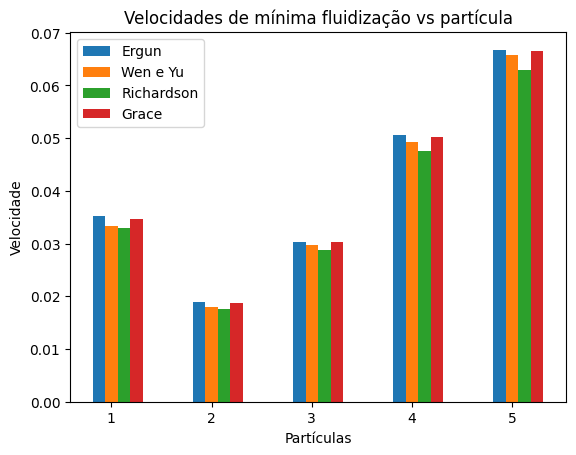

In [ ]:
#Velocidades
velocidades_ergun = v_min_Ergun_lista
velocidades_wen_yu = v_min_WenYu_lista
velocidade_richardson = v_min_Richardson_lista
velocidades_grace = v_min_Grace_lista

# Nome das equacões
tipos_velocidade = ['Ergun', 'Wen e Yu', 'Richardson', 'Grace']

# Criando os índices para as barras
num_particulas = len(velocidades_ergun)
indices = np.arange(1, 2 * num_particulas, 2)

# Largura das barras
largura_barra = 0.25

# Plotando as barras para cada tipo de velocidade
plt.bar(indices - largura_barra, velocidades_ergun, largura_barra, label='Ergun')
plt.bar(indices, velocidades_wen_yu, largura_barra, label='Wen e Yu')
plt.bar(indices + largura_barra, velocidade_richardson, largura_barra, label='Richardson')
plt.bar(indices + 2*largura_barra, velocidades_grace, largura_barra, label='Grace')

# Adicionando rótulos e legendas
plt.xlabel('Partículas')
plt.ylabel('Velocidade')
plt.title('Velocidades de mínima fluidização vs partícula')
plt.xticks(indices, range(1, num_particulas + 1))
plt.legend()

# Exibindo o gráfico
plt.show()

## Perda de carga pela altura na condição de mínima fluidização

Queda de pressão dividido pela altura do leito na mínima fluidização:

$$\frac{-ΔP}{H_{mf}} = (1 - ℇ_{mf}) ⋅ (𝘱_p - 𝘱) ⋅ g$$

<br>

${ΔP}$ = queda de pressão na condição de mínima fluidização

$H_{mf}$ = altura do leito na mínima fluidização

$ℇ_{mf}$= porosidade na mínima fluidização;

$𝘱_p$ = massa específica da partícula;

$𝘱$ = massa específica do fluido;

$g$ = aceleração da gravidade.

In [ ]:
def eq_DeltaPsL (Dp, porosidade, rho_p, rho_f,g ):
        parc3 = (1 - porosidade)*(rho_p-rho_f)*g
        return parc3

In [ ]:
DeltaPsL_list = []
for D, porosi, rho in zip(Dp, porosidade_mf, rho_p):
    DeltaPsL = eq_DeltaPsL(D,porosi, rho,rho_f, g)
    DeltaPsL_list.append(DeltaPsL)
print(" - DeltaP/H_mf (Pa/m) da partícula 1", DeltaPsL_list[0])
print(" - DeltaP/H_mf (Pa/m) da partícula 2:", DeltaPsL_list[1])
print(" - DeltaP/H_mf (Pa/m) da partícula 3:", DeltaPsL_list[2])
print(" - DeltaP/H_mf (Pa/m) da partícula 4:", DeltaPsL_list[3])
print(" - DeltaP/H_mf (Pa/m) da partícula 5:", DeltaPsL_list[4])

 - DeltaP/H_mf (Pa/m) da partícula 1 7785.586090342911
 - DeltaP/H_mf (Pa/m) da partícula 2: 954.0709682220686
 - DeltaP/H_mf (Pa/m) da partícula 3: 1822.3085085916273
 - DeltaP/H_mf (Pa/m) da partícula 4: 8626.483398276689
 - DeltaP/H_mf (Pa/m) da partícula 5: 8626.483398276689


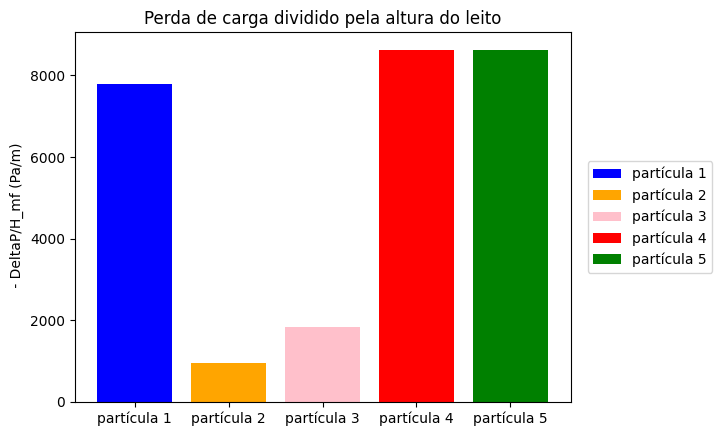

In [ ]:
# Criando um gráfico

#Inserindo os valores de Velocidade e DeltaP/H na mínima fluidização de cada partícula
Particula= ['partícula 1', 'partícula 2', 'partícula 3','partícula 4', 'partícula 5']
plt.bar(Particula[0],DeltaPsL_list[0], color='b') #0 - partícula 1
plt.bar(Particula[1],DeltaPsL_list[1],color='orange') #1 - partícula 2
plt.bar(Particula[2],DeltaPsL_list[2], color='pink') #2- partícula 3
plt.bar(Particula[3],DeltaPsL_list[3], color='r') #3- partícula 4
plt.bar(Particula[4],DeltaPsL_list[4], color='g') #3- partícula 5

# Definindo rótulos para os eixos
plt.ylabel(' - DeltaP/H_mf (Pa/m)')

# Adicionando um título ao gráfico
plt.title('Perda de carga dividido pela altura do leito')

# Adicionando as legendas
legendas = ['partícula 1', 'partícula 2', 'partícula 3', 'partícula 4', 'partícula 5']

# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.30, 0.5))

# Exibindo o gráfico
plt.show()

## Velocidade máxima de fluidização homogênea


Velocidade terminal/máxima de fluidização:

$$V_t = \sqrt{\frac{4 \cdot d_p ⋅ (𝘱_p - 𝘱) ⋅ g}{3 ⋅ 𝘱 ⋅ C_D}}$$

<br>

Coeficiente de arraste ($C_D$) para partículas esféricas e simétricas:

$$C_D = \frac{24}{Re_{p}} ⋅ (1+ Re_{p}^{0,6459}) + \frac{0,4251}{1 + \frac{6880,95}{Re_{p}}}$$

<br>

  Coeficiente de arraste ($C_D$) para partículas não esféricas e simétricas:

$$C_D = \frac{24}{Re_{p}} ⋅ (1+ [8,1717  exp(-4,0655 ⋅ 𝜙_p)] ⋅ Re_{p}^{(0,0964 + 0,5565 ⋅ 𝜙_p)})+\frac{73,69 ⋅ Re_{p}exp(-5,0748 ⋅ 𝜙_p)}{Re_{p}+ 5,378 exp(6,2122 ⋅ 𝜙_p)}$$
<br>

Número de Reynolds para os coeficientes de arraste:

$$Re_{p} = \frac{ 𝘱 ⋅ V_t ⋅ d_p }{𝜇}$$

<br>

$V_t$= velocidade terminal da partícula;

$C_D$= coeficiente de arraste;

$Re_{p}$= número de reynolds da partícula;

$ℇ_{mf}$ = porosidade na mínima fluidização;

$𝘱_p$ = massa específica da partícula;

$𝘱$ = massa específica do fluido;

$g$ = aceleração da gravidade;

$𝜇$ = viscosidade dinâmica do fluido;

$𝜙_p$ = esfericidade da partícula;

$d_p$ = diâmetro da partícula.



In [ ]:
# Função para determinar a velocidade terminal usando a equação de Cd para particulas esfericas e isomeras
def Velocidade_max_esferas (rho_p, mu_f, Dp, rho_f,g):

  Vt = 0.1  # Chute inicial
  tolerancia = 0.0001 #tolerancia para a convergência

  while True:
    Re = rho_f * Vt * Dp / mu_f #equação de reynolds
    Cd = ((24/Re)*(1+(0.1806*(Re**0.6459))))+(0.4251/(1+(6880.95/Re))) #equação do coeficiente de arraste
    nova_Vt = (4*Dp*(rho_p-rho_f)*g /(3*rho_f*Cd))**(1/2) #equação da velocidade terminal

    if abs(nova_Vt - Vt) < tolerancia: #comparando o chute inicial e o novo valor de Vt para saber se são muito parecidos
      break

    Vt = nova_Vt

  return Vt, Re

In [ ]:
#função para determinar a velocidade terminal usando a equação de Cd para particulas esfericas e isomeras
def Velocidade_max_nao_esfericas(rho_p, mu_f, Dp, rho_f,g, esfericidade):

  Vt = 0.1  # Chute inicial
  tolerancia = 0.0001 #tolerancia para a convergência

  while True:
    Re = rho_f * Vt * Dp / mu_f #equação de reynolds
    Cd = (24/Re)*(1+(8.1717*math.exp(-4.0655*esfericidade))*Re**(0.0964+0.5565*esfericidade))+((73.69*Re*math.exp(-5.0748*esfericidade))/(Re+5.378*math.exp(6.2122*esfericidade)))#equação do coeficiente de arraste
    nova_Vt = (4*Dp*(rho_p-rho_f)*g /(3*rho_f*Cd))**(1/2) #equação da velocidade terminal

    if abs(nova_Vt - Vt) < tolerancia: #comparando o chute inicial e o novo valor de Vt para saber se são muito parecidos
      break

    Vt = nova_Vt

  return Vt, Re

In [ ]:
#Determinando velocidade máxima de fluidização homogênia para a partícula 1
V_max_particula_1=Velocidade_max_esferas (rho_p[0], mu_f, Dp[0], rho_f,g)
print("partícula 1")
print("Velocidade máxima:", V_max_particula_1[0])
print("Número de Reynolds:", V_max_particula_1[1])

partícula 1
Velocidade máxima: 0.3638155352187533
Número de Reynolds: 1298.8380928229394


In [ ]:
#Determinando velocidade máxima de fluidização homogênia para a partícula 2
V_max_particula_2=Velocidade_max_nao_esfericas(rho_p[1], mu_f, Dp[1], rho_f,g, esfericidade[1])
print("partícula 2")
print("Velocidade máxima:", V_max_particula_2[0])
print("Número de Reynolds:",V_max_particula_2[1])

partícula 2
Velocidade máxima: 0.18068898753303575
Número de Reynolds: 1438.4273734410783


In [ ]:
#Determinando velocidade máxima de fluidização homogênia para a partícula 3
V_max_particula_3=Velocidade_max_nao_esfericas(rho_p[2], mu_f, Dp[2], rho_f,g, esfericidade [2])
print("partícula 3")
print("Velocidade máxima:", V_max_particula_3[0])
print("Número de Reynolds:",V_max_particula_3[1])

partícula 3
Velocidade máxima: 0.19293073685957224
Número de Reynolds: 1781.3057342010263


In [ ]:
#Determinando velocidade máxima de fluidização homogênia para a partícula 4
V_max_particula_4=Velocidade_max_esferas (rho_p[3], mu_f, Dp[3], rho_f,g)
print("partícula 4")
print("Velocidade máxima:", V_max_particula_4[0])
print("Número de Reynolds:", V_max_particula_4[1])

partícula 4
Velocidade máxima: 0.5012787570900515
Número de Reynolds: 2807.8019862286005


In [ ]:
#Determinando velocidade máxima de fluidização homogênia para a partícula 5
V_max_particula_5=Velocidade_max_esferas (rho_p[4], mu_f, Dp[4], rho_f,g)
print("partícula 5")
print("Velocidade máxima:", V_max_particula_5[0])
print("Número de Reynolds:", V_max_particula_5[1])

partícula 5
Velocidade máxima: 0.6285120060844369
Número de Reynolds: 5632.753382319388


In [ ]:
Velocidade_max=(V_max_particula_1[0], V_max_particula_2[0], V_max_particula_3[0],  V_max_particula_4[0],  V_max_particula_5[0])
Velocidade_max

(0.3638155352187533,
 0.18068898753303575,
 0.19293073685957224,
 0.5012787570900515,
 0.6285120060844369)

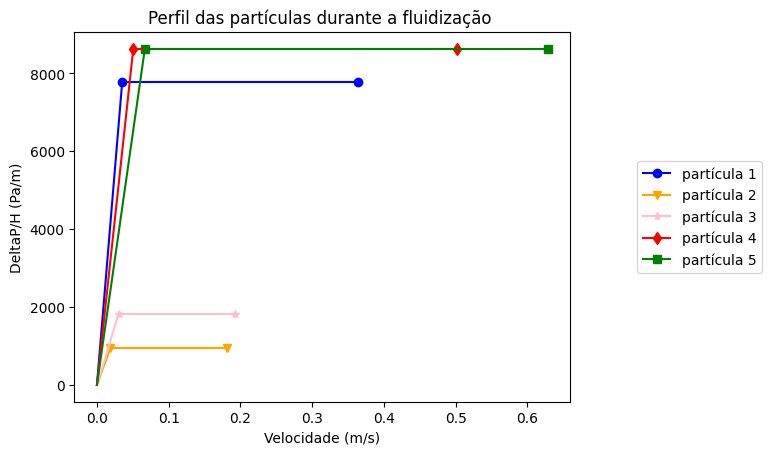

In [ ]:
# Criando um gráfico

#Inserindo os pontos de Velocidade e DeltaP/H na mínima fluidização de cada partícula
plt.plot(v_min_Ergun_lista[0], DeltaPsL_list[0], marker='o', color='b') #0 - partícula 1
plt.plot(v_min_Ergun_lista[1], DeltaPsL_list[1], marker='v', color='orange') #1 - partícula 2
plt.plot(v_min_Ergun_lista[2], DeltaPsL_list[2], marker='*', color='pink') #2- partícula 3
plt.plot(v_min_Ergun_lista[3], DeltaPsL_list[3], marker='d', color='r') #3- partícula 4
plt.plot(v_min_Ergun_lista[4], DeltaPsL_list[4], marker='s', color='g') #3- partícula 5

#Inserindo os pontos de Velocidade máxima de cada partícula
plt.plot(Velocidade_max[0], DeltaPsL_list[0], marker='o', color='b') #0 - partícula 1
plt.plot(Velocidade_max[1], DeltaPsL_list[1], marker='v', color='orange') #1 - partícula 2
plt.plot(Velocidade_max[2], DeltaPsL_list[2], marker='*', color='pink') #2- partícula 3
plt.plot(Velocidade_max[3], DeltaPsL_list[3], marker='d', color='r') #3- partícula 4
plt.plot(Velocidade_max[4], DeltaPsL_list[4], marker='s', color='g') #3- partícula 5

# Adicionando uma reta para a partícula 1
x_particula_1 = [0, v_min_Ergun_lista[0]]
y_particula_1 = [0, DeltaPsL_list[0]]
plt.plot(x_particula_1, y_particula_1, color='b', linestyle='-')

# Adicionando uma reta para a partícula 1 na fluidização homogênia
x_particula_1 = [v_min_Ergun_lista[0], Velocidade_max[0]]
y_particula_1 = [DeltaPsL_list[0], DeltaPsL_list[0]]
plt.plot(x_particula_1, y_particula_1, color='b', linestyle='-')

# Adicionando uma reta para a partícula 2
x_particula_2 = [0, v_min_Ergun_lista[1]]
y_particula_2 = [0, DeltaPsL_list[1]]
plt.plot(x_particula_2, y_particula_2, color='orange', linestyle='-')

# Adicionando uma reta para a partícula 2 na fluidização homogênia
x_particula_2 = [v_min_Ergun_lista[1], Velocidade_max[1]]
y_particula_2 = [DeltaPsL_list[1],DeltaPsL_list[1]]
plt.plot(x_particula_2, y_particula_2, color='orange', linestyle='-')

# Adicionando uma reta para a partícula 3
x_particula_3= [0, v_min_Ergun_lista[2]]
y_particula_3 = [0, DeltaPsL_list[2]]
plt.plot(x_particula_3, y_particula_3, color='pink', linestyle='-')

# Adicionando uma reta para a partícula 3 na fluidização homogênia
x_particula_3= [v_min_Ergun_lista[2], Velocidade_max[2]]
y_particula_3 = [DeltaPsL_list[2], DeltaPsL_list[2]]
plt.plot(x_particula_3, y_particula_3, color='pink', linestyle='-')

# Adicionando uma reta para a partícula 4
x_particula_3= [0, v_min_Ergun_lista[3]]
y_particula_3 = [0, DeltaPsL_list[3]]
plt.plot(x_particula_3, y_particula_3, color='r', linestyle='-')

# Adicionando uma reta para a partícula 4 na fluidização homogênia
x_particula_3= [v_min_Ergun_lista[3],  Velocidade_max[3]]
y_particula_3 = [DeltaPsL_list[3], DeltaPsL_list[3]]
plt.plot(x_particula_3, y_particula_3, color='r', linestyle='-')

# Adicionando uma reta para a partícula 5
x_particula_3= [0, v_min_Ergun_lista[4]]
y_particula_3 = [0, DeltaPsL_list[4]]
plt.plot(x_particula_3, y_particula_3, color='g', linestyle='-')

# Adicionando uma reta para a partícula 5 na fluidização homogênia
x_particula_3= [v_min_Ergun_lista[4],Velocidade_max[4]]
y_particula_3 = [DeltaPsL_list[4], DeltaPsL_list[4]]
plt.plot(x_particula_3, y_particula_3, color='g', linestyle='-')

# Definindo rótulos para os eixos
plt.xlabel('Velocidade (m/s)')
plt.ylabel('DeltaP/H (Pa/m)')

# Adicionando um título ao gráfico
plt.title('Perfil das partículas durante a fluidização ')

# Adicionando as legendas
legendas = ['partícula 1', 'partícula 2', 'partícula 3', 'partícula 4', 'partícula 5']


# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.40, 0.5))

# Exibindo o gráfico
plt.show()

## Altura do fluido manométrico na velocidade de minima fluidizacao

$$ΔP = (𝘱_p - 𝘱) ⋅ g ⋅ h $$

<br>

$ΔP$ = queda de pressão na condição de mínima fluidização

$𝘱_p$ = massa específica da partícula;

$𝘱$ = massa específica do fluido;

$g$ = aceleração da gravidade;

$h$ = diferença de nível do fluido nos dois lados do manômetro


Considerando que apenas tenho $\frac{-ΔP}{H_{mf}}$, adotei a altura do leito fixo no lugar da altura na mínima fluidização para obter a queda de pressão $ΔP$ dos sistemas com cada partícula.

In [ ]:
#Uma lista com a variação da pressão
DeltaP_list = [Lf * DPL for DPL in DeltaPsL_list]
DeltaP_list

[1089.9820526480078,
 133.56993555108963,
 255.12319120282785,
 1207.7076757587365,
 1207.7076757587365]

In [ ]:
# Equação que calcula a altura do fluido manométrico no manometro a partir da perda de carga
def eq_h_mano(DeltaP, rho_mano, rho_f, g):
    divisor = (rho_mano - rho_f)*g
    h_mano = DeltaP/ divisor
    return h_mano

In [ ]:
#Altura do fluido manométrico sendo os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 1:
h_mano_list_particula_1_conhecidos = []
for rho_mano2 in rho_mano:
    h_mano = eq_h_mano(DeltaP_list[0], rho_mano2, rho_f, g)
    h_mano_list_particula_1_conhecidos.append(h_mano)
print("Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 1: ", h_mano_list_particula_1_conhecidos)


Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 1:  [-0.11157050291750586, 0.18612828815729152, 0.008863251817013881]


In [ ]:
#Altura do fluido manométrico sendo os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 2
h_mano_list_particula_2_conhecidos = []
for rho_mano2 in rho_mano:
    h_mano = eq_h_mano(DeltaP_list[1], rho_mano2, rho_f, g)
    h_mano_list_particula_2_conhecidos.append(h_mano)
print("Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 2: ", h_mano_list_particula_2_conhecidos)

Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 2:  [-0.013672211251451153, 0.022808764046165973, 0.0010861316212459988]


In [ ]:
#Altura do fluido manométrico sendo os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3
h_mano_list_particula_3_conhecidos = []
for rho_mano2 in rho_mano:
    h_mano = eq_h_mano(DeltaP_list[2], rho_mano2, rho_f, g)
    h_mano_list_particula_3_conhecidos.append(h_mano)
print("Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3: ", h_mano_list_particula_3_conhecidos)

Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3:  [-0.026114395809790986, 0.04356552727858763, 0.0020745489180279825]


In [ ]:
#Altura do fluido manométrico sendo os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 4
h_mano_list_particula_4_conhecidos = []
for rho_mano2 in rho_mano:
    h_mano = eq_h_mano(DeltaP_list[3], rho_mano2, rho_f, g)
    h_mano_list_particula_4_conhecidos.append(h_mano)
print("Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3: ", h_mano_list_particula_4_conhecidos)

Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3:  [-0.12362089121961711, 0.20623143448765277, 0.009820544499412037]


In [ ]:
#Altura do fluido manométrico sendo os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 5
h_mano_list_particula_5_conhecidos = []
for rho_mano2 in rho_mano:
    h_mano = eq_h_mano(DeltaP_list[4], rho_mano2, rho_f, g)
    h_mano_list_particula_5_conhecidos.append(h_mano)
print("Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3: ", h_mano_list_particula_5_conhecidos)

Lista da altura manometrica com os fluidos os fluidos Ar, Tetracloreto de carbono (CCl4) e Mercúrio (Hg) para a partícula 3:  [-0.12362089121961711, 0.20623143448765277, 0.009820544499412037]


In [ ]:
#DataFrame
dados = {
    'Partícula:':'partícula 1',
    'Fluido manométrico': ['Ar', 'CCl4', 'Mercúrio (Hg)'],
    'Variação de altura no manômetro (m)': h_mano_list_particula_1_conhecidos,
    }

# Criando o DataFrame
df_mano_particula_1 = pd.DataFrame(dados)

# Mostrando DataFrame
df_mano_particula_1

,Partícula:,Fluido manométrico,Variação de altura no manômetro (m)
0,partícula 1,Ar,-0.111571
1,partícula 1,CCl4,0.186128
2,partícula 1,Mercúrio (Hg),0.008863


In [ ]:
#Calculando os valores de altura no manômetro em diferentes massas específicas
h_mano_range_particula1 = eq_h_mano(DeltaP_list[0], rho_range, rho_f, g)

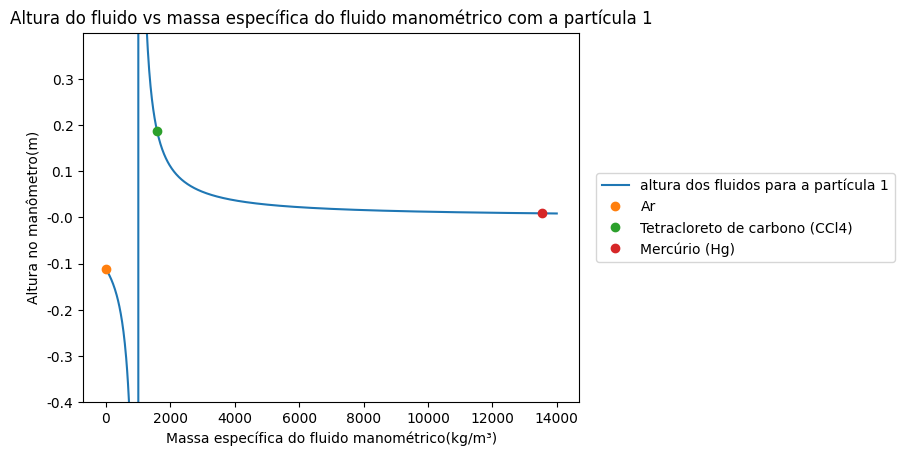

In [ ]:
#Gráfico altura do fluido vs massa específica do fluido manométrico com a partícula 1

#Calculando os valores de altura no manômetro em diferentes massas específicas
h_mano_range_particula1 = eq_h_mano(DeltaP_list[0], rho_range, rho_f, g)

# Plotar a linha
plt.plot(rho_range, h_mano_range_particula1)

#Plotar os pontos
plt.plot(rho_mano[0], h_mano_list_particula_1_conhecidos[0], "o")
plt.plot(rho_mano[1], h_mano_list_particula_1_conhecidos[1], "o")
plt.plot(rho_mano[2], h_mano_list_particula_1_conhecidos[2], "o")

# Limitar o eixo Y
plt.ylim([-0.4, 0.4])

# Especificar a metragem no eixo Y
plt.yticks(np.arange(-0.4, 0.4, 0.1), ["{:.1f}".format(y) for y in np.arange(-0.4, 0.4, 0.1)])

#Plotando o gráfico de altura manométrica por massa especifica
plt.xlabel("Massa específica do fluido manométrico(kg/m³)")
plt.ylabel("Altura no manômetro(m)")

# Adicionando um título ao gráfico
plt.title('Altura do fluido vs massa específica do fluido manométrico com a partícula 1')

# Adicionando as legendas
legendas = ['altura dos fluidos para a partícula 1', 'Ar', 'Tetracloreto de carbono (CCl4)', 'Mercúrio (Hg)']

# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.65, 0.5))

# Mostrar o gráfico da partícula 1
plt.show()

In [ ]:
#DataFrame
dados = {
    'Partícula:':'partícula 2',
    'Fluido manométrico': ['Ar', 'CCl4', 'Mercúrio (Hg)'],
    'Variação de altura no manômetro (m)': h_mano_list_particula_2_conhecidos,
    }

# Criando o DataFrame
df_mano_particula_2 = pd.DataFrame(dados)

#Mostrando dataframe da partícula 2
df_mano_particula_2

,Partícula:,Fluido manométrico,Variação de altura no manômetro (m)
0,partícula 2,Ar,-0.013672
1,partícula 2,CCl4,0.022809
2,partícula 2,Mercúrio (Hg),0.001086


In [ ]:
#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_particula2 = eq_h_mano(DeltaP_list[1], rho_range, rho_f, g)

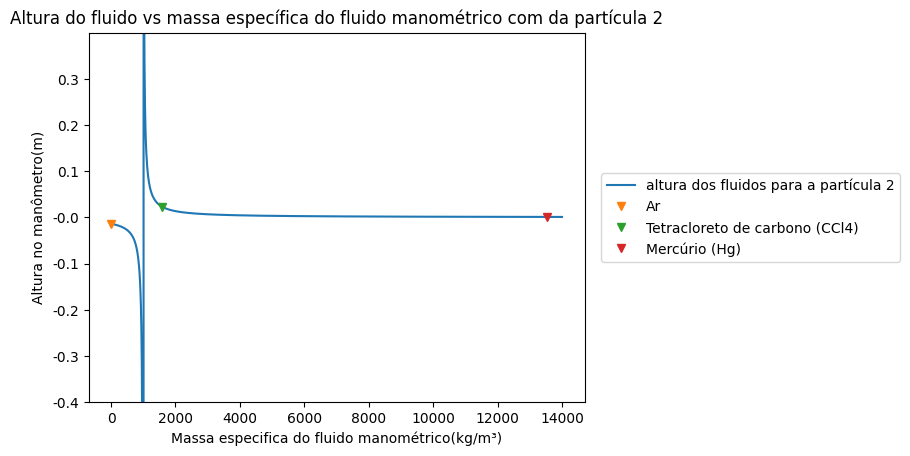

In [ ]:
#Gráfico altura do fluido vs massa específica do fluido manométrico com a partícula 2

#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_particula2 = eq_h_mano(DeltaP_list[1], rho_range, rho_f, g)

# Plotar a linha
plt.plot(rho_range, h_mano_range_particula2)

#Plotar os pontos
plt.plot(rho_mano[0], h_mano_list_particula_2_conhecidos[0], "v")
plt.plot(rho_mano[1], h_mano_list_particula_2_conhecidos[1], "v")
plt.plot(rho_mano[2], h_mano_list_particula_2_conhecidos[2], "v")

# Limitar o eixo Y
plt.ylim([-0.4, 0.4])

# Especificar a metragem no eixo Y
plt.yticks(np.arange(-0.4, 0.4, 0.1), ["{:.1f}".format(y) for y in np.arange(-0.4, 0.4, 0.1)])

#Plotando o gráfico de altura manométrica por massa especifica
plt.xlabel("Massa especifica do fluido manométrico(kg/m³)")
plt.ylabel("Altura no manômetro(m)")

# Adicionando um título ao gráfico
plt.title('Altura do fluido vs massa específica do fluido manométrico com da partícula 2')

# Adicionando as legendas
legendas = ['altura dos fluidos para a partícula 2', 'Ar', 'Tetracloreto de carbono (CCl4)', 'Mercúrio (Hg)']

# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.65, 0.5))

# Mostrar o gráfico
plt.show()

In [ ]:
#DataFrame
dados = {
    'Partícula:':'partícula 3',
    'Fluido manométrico': ['Ar', 'CCl4', 'Mercúrio (Hg)'],
    'Variação de altura no manômetro (m)': h_mano_list_particula_3_conhecidos,
    }

# Criando o DataFrame
df_mano_particula_3 = pd.DataFrame(dados)

#Mostrando dataframe
df_mano_particula_3

,Partícula:,Fluido manométrico,Variação de altura no manômetro (m)
0,partícula 3,Ar,-0.026114
1,partícula 3,CCl4,0.043566
2,partícula 3,Mercúrio (Hg),0.002075


In [ ]:
#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_partícula3 = eq_h_mano(DeltaP_list[2], rho_range, rho_f, g)

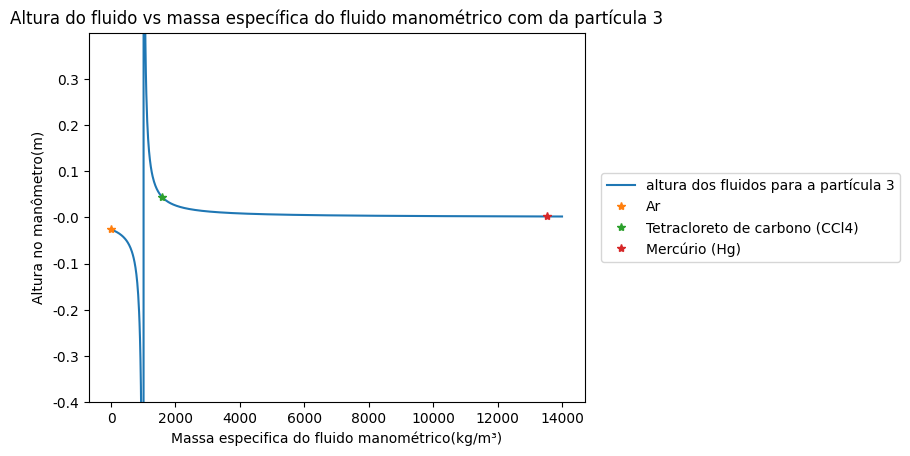

In [ ]:
#Gráfico altura do fluido vs massa específica do fluido manométrico com a partícula 3

#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_partícula3 = eq_h_mano(DeltaP_list[2], rho_range, rho_f, g)

# Plotar a linha
plt.plot(rho_range, h_mano_range_partícula3)

#Plotar os pontos
plt.plot(rho_mano[0], h_mano_list_particula_3_conhecidos[0], "*")
plt.plot(rho_mano[1], h_mano_list_particula_3_conhecidos[1], "*")
plt.plot(rho_mano[2], h_mano_list_particula_3_conhecidos[2], "*")

# Limitar o eixo Y
plt.ylim([-0.4, 0.4])

# Especificar a metragem no eixo Y
plt.yticks(np.arange(-0.4, 0.4, 0.1), ["{:.1f}".format(y) for y in np.arange(-0.4, 0.4, 0.1)])

#Plotando o gráfico de altura manométrica por massa especifica
plt.xlabel("Massa especifica do fluido manométrico(kg/m³)")
plt.ylabel("Altura no manômetro(m)")

# Adicionando um título ao gráfico
plt.title('Altura do fluido vs massa específica do fluido manométrico com da partícula 3')

# Adicionando as legendas
legendas = ['altura dos fluidos para a partícula 3', 'Ar', 'Tetracloreto de carbono (CCl4)', 'Mercúrio (Hg)']

# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.65, 0.5))

# Mostrar o gráfico
plt.show()

In [ ]:
#DataFrame
dados = {
    'Partícula:':'partícula 4',
    'Fluido manométrico': ['Ar', 'CCl4', 'Mercúrio (Hg)'],
    'Variação de altura no manômetro (m)': h_mano_list_particula_4_conhecidos,
    }

# Criando o DataFrame
df_particula_4 = pd.DataFrame(dados)

#Mostrando dataframe
df_particula_4

,Partícula:,Fluido manométrico,Variação de altura no manômetro (m)
0,partícula 4,Ar,-0.123621
1,partícula 4,CCl4,0.206231
2,partícula 4,Mercúrio (Hg),0.009821


In [ ]:
#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_particula4 = eq_h_mano(DeltaP_list[3], rho_range, rho_f, g)

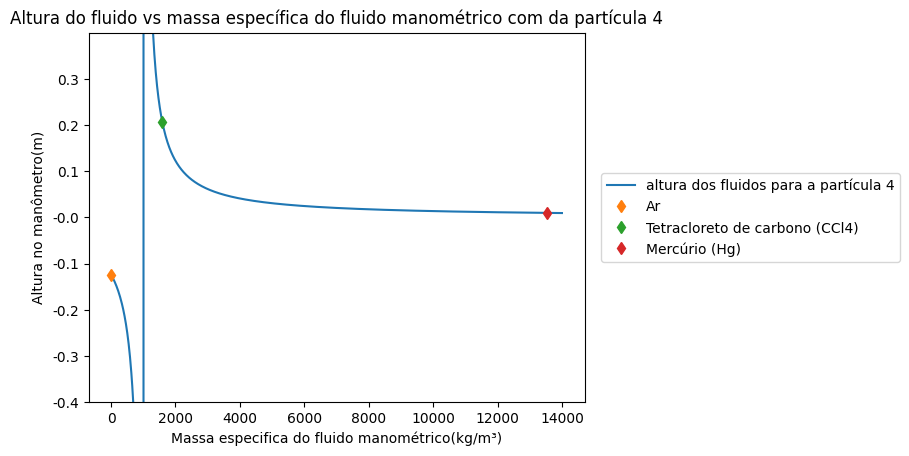

In [ ]:
#Gráfico altura do fluido vs massa específica do fluido manométrico com a partícula 4

#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_particula4 = eq_h_mano(DeltaP_list[3], rho_range, rho_f, g)

# Plotar a linha
plt.plot(rho_range, h_mano_range_particula4)

#Plotar os pontos
plt.plot(rho_mano[0], h_mano_list_particula_4_conhecidos[0], "d")
plt.plot(rho_mano[1], h_mano_list_particula_4_conhecidos[1], "d")
plt.plot(rho_mano[2], h_mano_list_particula_4_conhecidos[2], "d")

# Limitar o eixo Y
plt.ylim([-0.4, 0.4])

# Especificar a metragem no eixo Y
plt.yticks(np.arange(-0.4, 0.4, 0.1), ["{:.1f}".format(y) for y in np.arange(-0.4, 0.4, 0.1)])

#Plotando o gráfico de altura manométrica por massa especifica
plt.xlabel("Massa especifica do fluido manométrico(kg/m³)")
plt.ylabel("Altura no manômetro(m)")

# Adicionando um título ao gráfico
plt.title('Altura do fluido vs massa específica do fluido manométrico com da partícula 4')

# Adicionando as legendas
legendas = ['altura dos fluidos para a partícula 4', 'Ar', 'Tetracloreto de carbono (CCl4)', 'Mercúrio (Hg)']

# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.65, 0.5))

# Mostrar o gráfico
plt.show()

In [ ]:
#DataFrame
dados = {
    'Partícula:':'partícula 5',
    'Fluido manométrico': ['Ar', 'CCl4', 'Mercúrio (Hg)'],
    'Variação de altura no manômetro (m)': h_mano_list_particula_5_conhecidos,
    }

# Criando o DataFrame
df_particula_5 = pd.DataFrame(dados)

#Mostrando dataframe
df_particula_5

,Partícula:,Fluido manométrico,Variação de altura no manômetro (m)
0,partícula 5,Ar,-0.123621
1,partícula 5,CCl4,0.206231
2,partícula 5,Mercúrio (Hg),0.009821


In [ ]:
#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_particula5 = eq_h_mano(DeltaP_list[4], rho_range, rho_f, g)

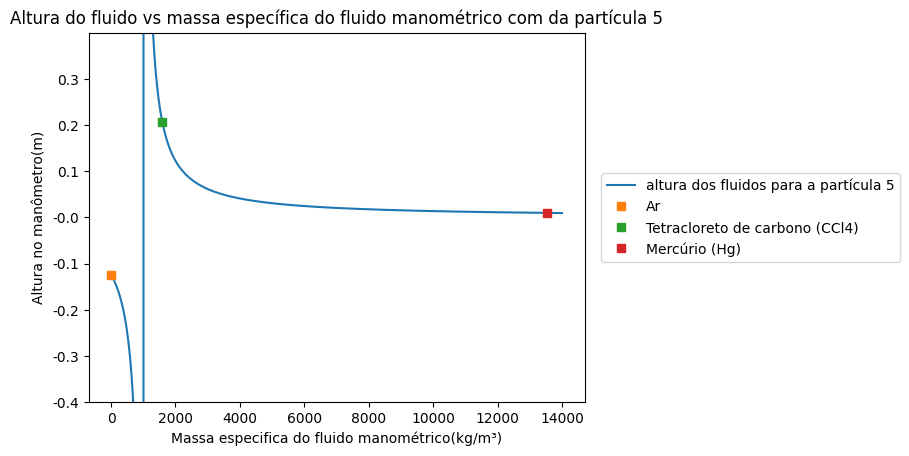

In [ ]:
#Gráfico altura do fluido vs massa específica do fluido manométrico com a partícula 5

#Calculando os valores de altura no manômetro em diferentes massas especificas
h_mano_range_particula5 = eq_h_mano(DeltaP_list[4], rho_range, rho_f, g)

# Plotar a linha
plt.plot(rho_range, h_mano_range_particula5)

#Plotar os pontos
plt.plot(rho_mano[0], h_mano_list_particula_5_conhecidos[0], "s")
plt.plot(rho_mano[1], h_mano_list_particula_5_conhecidos[1], "s")
plt.plot(rho_mano[2], h_mano_list_particula_5_conhecidos[2], "s")

# Limitar o eixo Y
plt.ylim([-0.4, 0.4])

# Especificar a metragem no eixo Y
plt.yticks(np.arange(-0.4, 0.4, 0.1), ["{:.1f}".format(y) for y in np.arange(-0.4, 0.4, 0.1)])

#Plotando o gráfico de altura manométrica por massa especifica
plt.xlabel("Massa especifica do fluido manométrico(kg/m³)")
plt.ylabel("Altura no manômetro(m)")

# Adicionando um título ao gráfico
plt.title('Altura do fluido vs massa específica do fluido manométrico com da partícula 5')

# Adicionando as legendas
legendas = ['altura dos fluidos para a partícula 5', 'Ar', 'Tetracloreto de carbono (CCl4)', 'Mercúrio (Hg)']

# Adicionar legenda fora do gráfico
plt.legend(legendas, loc='center right', bbox_to_anchor=(1.65, 0.5))

# Mostrar o gráfico
plt.show()

## Potência requerida pela bomba para o arraste das partículas


Queda de pressão total, incluindo distribuidor e leito:

$$ΔP_{total} = 1,5 ⋅ ΔP +  𝘱 ⋅ g ⋅ h_{leito}$$

<br>

Potência requerida pela bomba:

$$Pot = \frac{ΔP_{total} ⋅ Q}{𝜂}$$

<br>



$ΔP_{total}$ = variação total da pressão no sistema;

$ΔP$ = variação de pressão no leito;

$𝘱$ = massa específica do fluido de processo,

$h_{leito}$ = altura total do leito;

$g$ = aceleração da gravidade;

$Pot$ = potência requerida;

$Q$= vazão volumétrica do fluido no sistema;

$𝜂$= eficiência da máquina.

In [ ]:
#Assumindo esse valor para a eficiência da bomba
eficiencia=0.60

In [ ]:
#Vazão volumétrica na velocidade máxima de fluidização
Q_max=[velmax * A_T for velmax in Velocidade_max]
Q_max #mˆ3/s

[0.00025716604785864166,
 0.00012772151905913163,
 0.00013637470175318196,
 0.00035433307365181384,
 0.0004442689577267663]

In [ ]:
#Equação para calculo da potência requerida pela bomba
def eq_Pot(DeltaP, Q_max,eficiencia, rho_f, g, L):
    Potencia = []
    for DeltaP1, Q in zip(DeltaP_list, Q_max):
        DeltaP2 = rho_f*g*L
        Pot = ((1.5 * DeltaP1+DeltaP2)*Q)/eficiencia
        Potencia.append(Pot)
    return Potencia

In [ ]:
#Calculo da potência
Potencia = eq_Pot(DeltaP_list, Q_max,eficiencia, rho_f, g, L)
print(Potencia) #W

[3.2161226144421144, 1.2919012927423081, 1.4208700812938428, 4.53558016260055, 5.686789129667317]


In [ ]:
#Um dataframe com todas as Potências requeridas pela bomba para cada partícula
dados_potencia = {'Potência requerida pela bomba (W)': Potencia}

# Índices das linhas
linhas = ['partícula 1', 'partícula 2', 'partícula 3', 'partícula 4', 'partícula 5']

# Criando o DataFrame
df_potencia = pd.DataFrame(dados_potencia, index=linhas)
df_potencia = df_potencia.rename_axis('Partícula', axis=1)

# Adicionando linha com informação da bomba
df_potencia.loc['Potência da bomba (W)'] = [367.75]

#Mostrando dataframe
df_potencia

Partícula,Potência requerida pela bomba (W)
partícula 1,3.216123
partícula 2,1.291901
partícula 3,1.420870
partícula 4,4.535580
partícula 5,5.686789
Potência da bomba (W),367.750000


# DataFrame com todos os resultados

In [ ]:
#Um dataframe com as variáveis do sistema particulado
dados_particulas = {
    'Diâmetro médio (m)': Dp,
    'Massa específica das partículas(Kg/mˆ3)': rho_p,
    'Esfericidade': esfericidade,
    'Porosidade experimental': porosidade_experimental,
    'Porosidade na minima fluidização':porosidade_mf}


# Índices das linhas
linhas = ['partícula 1', 'partícula 2', 'partícula 3', 'partícula 4', 'partícula 5']

# Criando o DataFrame
df_entrada = pd.DataFrame(dados_particulas, index=linhas)
df_entrada = df_entrada.rename_axis('Partícula', axis=1)

#Mostrando dataframe
df_entrada

Partícula,Diâmetro médio (m),Massa específica das partículas(Kg/mˆ3),Esfericidade,Porosidade experimental,Porosidade na minima fluidização
partícula 1,0.003187,2353.494576,1.000000,0.415625,0.414913
partícula 2,0.007106,1164.020154,0.981309,0.352727,0.417531
partícula 3,0.008242,1329.445360,0.832000,0.443333,0.441147
partícula 4,0.005000,2500.000000,1.000000,-,0.414913
partícula 5,0.008000,2500.000000,1.000000,-,0.414913


In [ ]:
#Um dataframe com todas as informações cálculadas
dados = {
    'Velocidade superficial de mínima fluidização (m/s)': v_min_Ergun_lista,
    'Variação da perda de carga sobre a altura do leito na mínima fluidização (Pa/m)': DeltaPsL_list,
    'Velocidade máxima de fluidização (m/s)': Velocidade_max,
    'Potência requerida pela bomba (W)': Potencia}

# Índices das linhas
linhas = ['partícula 1', 'partícula 2', 'partícula 3', 'partícula 4', 'partícula 5']

# Criando o DataFrame
df_avaliacao_fluidodinamica = pd.DataFrame(dados, index=linhas)
df_avaliacao_fluidodinamica = df_avaliacao_fluidodinamica.rename_axis('Partícula', axis=1)

#Mostrando dataframe
df_avaliacao_fluidodinamica

Partícula,Velocidade superficial de mínima fluidização (m/s),Variação da perda de carga sobre a altura do leito na mínima fluidização (Pa/m),Velocidade máxima de fluidização (m/s),Potência requerida pela bomba (W)
partícula 1,0.0352292030103666,7785.586090,0.363816,3.216123
partícula 2,0.0188660883231483,954.070968,0.180689,1.291901
partícula 3,0.0301971786617999,1822.308509,0.192931,1.420870
partícula 4,0.0506405621015721,8626.483398,0.501279,4.535580
partícula 5,0.0667464501706733,8626.483398,0.628512,5.686789


In [ ]:
#Um dataframe com todas as alturas manometricas
# Criando um DataFrame vazio
df_h_mano_geral = pd.DataFrame(columns=['Variação de altura no manômetro com Ar (m)','Variação de altura no manômetro com Tetracloreto de carbono (CCl4) (m)','Variação de altura no manômetro com Mercúrio (Hg)(m)'])

# Adicionando linhas ao DataFrame
df_h_mano_geral.loc[0] = h_mano_list_particula_1_conhecidos
df_h_mano_geral.loc[1] = h_mano_list_particula_2_conhecidos
df_h_mano_geral.loc[2] = h_mano_list_particula_3_conhecidos
df_h_mano_geral.loc[3] = h_mano_list_particula_4_conhecidos
df_h_mano_geral.loc[4] = h_mano_list_particula_5_conhecidos

# Criando a coluna com nomes das parículas
particulas_coluna = ['Partícula 1', 'Partícula 2', 'Partícula 3', 'Partícula 4', 'Partícula 5']
indice_nova_coluna = 0
df_h_mano_geral.insert(indice_nova_coluna, 'Partícula', particulas_coluna)

#Mostrando DataFrame
df_h_mano_geral

,Partícula,Variação de altura no manômetro com Ar (m),Variação de altura no manômetro com Tetracloreto de carbono (CCl4) (m),Variação de altura no manômetro com Mercúrio (Hg)(m)
0,Partícula 1,-0.111571,0.186128,0.008863
1,Partícula 2,-0.013672,0.022809,0.001086
2,Partícula 3,-0.026114,0.043566,0.002075
3,Partícula 4,-0.123621,0.206231,0.009821
4,Partícula 5,-0.123621,0.206231,0.009821
